Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Ananya Gandhi, no collaborators

# HW 6:  Linear Algebra Part 1

## Question 1

[25] - Write a function that computes the least-squares fit of a given polynomial order $n$ without using the function `numpy.linalg.lstsq` and `numpy.vander` (i.e. construct the system that needs to be solved yourself).  This function should return the coefficients of the resulting polynomial in accending order of powers.  If the function does not receive valid input (most notably an underconstrained system) raise a `ValueError` with an appropriate error message.  Make sure to mention this in your `doc-string`.  You can use `numpy.linalg.solve`. 

Also write a function that plots the resulting polynomial along with the data given the data, a set of $x$ points and the coefficients from the first function.  Make sure to label your plot (both the axes and with a legend).

In [2]:
def compute_lstsq(data, n):
    # YOUR CODE HERE
    # raise NotImplementedError()

    """ This method generates a Vandermonde matrix to construct and solve a
        system and return the coefficients of the resulting least-squares 
        polynomial. 

        Parameters:
        -----------
        data: numpy array of data to fit
        
        n: polynomial order

        Returns:
        --------
        p: numpy array of polynomial coefficients
    """

    m = data.shape[0]

    if n > m:
      raise ValueError("Invalid input, underconstrained system")

    # generate vandermonde matrix
    A = numpy.ones((data.shape[0], n+1))
    A[:, 1] = data[:, 0]

    for i in range(2, A.shape[1]):
      A[:, i] = numpy.power(data[:, 0], i)

    y = data[:, 1]
    p = numpy.linalg.solve(numpy.dot(A.transpose(), A), numpy.dot(A.transpose(), y))
    
    return p

def plot_lstsq(data, x, p):
    # YOUR CODE HERE

    """ This method plots the least-squares polynomial generated given the data,
        points, and polynomial coefficients.

        Parameters:
        -----------
        data: numpy array of data to fit
        
        n: polynomial order

        p: numpy array of polynomial coefficients

        Returns:
        --------
        None
    """
    
    fx = numpy.zeros(x.shape)
    for i in range(N_p + 1):
      fx += p[i] * (x ** i)

    
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)

    axes.plot(x, fx)
    axes.plot(data[:, 0], data[:, 1], "bo")
    axes.set_title("Least Squares Fit to Data")
    axes.set_xlabel("$x$")
    axes.set_ylabel("$f(x)$ and $y_i$")

    # raise NotImplementedError()

Success!


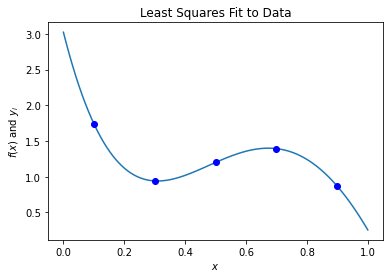

In [3]:
try:
    N = 5
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    raise e
else:
    P = numpy.zeros(N)
    for n in range(N):
        P += p[n] * data[:, 0]**n
    numpy.testing.assert_allclose(P, data[:, 1])
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

Success!


<ipython-input-4-3e9867412b74>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))


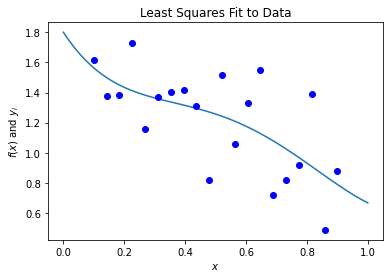

In [4]:
try:
    N = 20
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print(e)
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

In [5]:
try:
    N = 5
    N_p = 6
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print(e)
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()
    assert(False)

Invalid input, underconstrained system


## Question 2

Consider a square matrix that looks like
$$
    A = \frac{1}{\Delta x^2} \begin{bmatrix}
        -2 &  1 &  ~ &  ~ &  ~ &  ~ &  ~ \\
         1 & -2 &  1 &  ~ &  ~ &  ~ &  ~ \\
         ~ &  1 & -2 &  1 &  ~ &  ~ &  ~ \\
         ~ &  ~ & \ddots & \ddots & \ddots & ~ & ~\\
         ~ &  ~ & ~ & 1 & -2 & 1 & ~ \\
         ~ &  ~ & ~ & ~ & 1 & -2 & 1 \\
         ~ &  ~ & ~ & ~ &  ~ & 1 & -2 \\
    \end{bmatrix}
$$
This matrix can be characterized as having $A_{ii} = -2$, $A_{ii-1} = A_{ii+1} = 1$ so that the "main" diagonal has the value -2 and the secondary-diagonals are 1 (these are the diagonals that are just above and below the main diagonal).  This matrix is from a discretization of the second derivative using a second order finite difference formula (hence the values of 1, -2, and 1 and the $\Delta x^2$ factor) with boundary conditions set to 0.  

**(a)** [10] - Write a function that computes the eigenvalues of the matrix above using whatever functions you would like.  The function should take in the size of the matrix $m$ (the matrix should be square) and the value of $\Delta x$ and return the eigenvalues.  You may use the `numpy.linalg.eigvals` command.

In [6]:
def compute_eigenvalues(m, dx):
    # YOUR CODE HERE
    # raise NotImplementedError()

    # create matrix
    A = numpy.zeros((m, m))
    A += numpy.diag(numpy.ones(m) * -2, 0)
    A += numpy.diag(numpy.ones(m - 1) * 1, -1)
    A += numpy.diag(numpy.ones(m - 1) * 1, 1)
    A *= (1/dx **2)
    
    # try QR iteration
    MAX_STEPS = 1000

    for i in range(MAX_STEPS):
        Q, R = numpy.linalg.qr(A)
        A = numpy.dot(R, Q)
    
    eig_values = numpy.diag(A, 0)
    #eig_values = numpy.linalg.eigvals(A)

    return eig_values

In [7]:
# Compare against analytical values
m = 10
dx = 1.0 / (m + 1)
eig_values = numpy.flipud(numpy.sort(compute_eigenvalues(m, dx)))
p = numpy.arange(1, m + 1)
numpy.testing.assert_allclose(eig_values,
    2.0 / dx**2 * (numpy.cos(p * numpy.pi * dx) - 1.0))
print("Success!")

Success!


**(b)** [10] - Plot the eigenvalues in the complex plane for $m=30$ and $\Delta x = 1/31$.  Make sure to plot the axes and label everything appropriately.

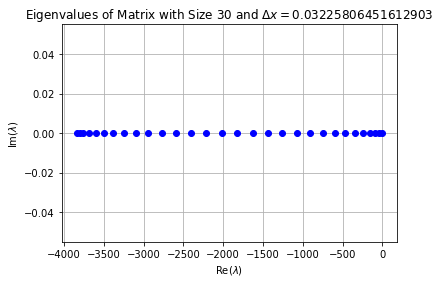

In [8]:
# YOUR CODE HERE

m = 30
dx = 1/31
eig = compute_eigenvalues(m, dx)

re_eig = numpy.real(eig)
im_eig = numpy.imag(eig)

plt.plot(re_eig, im_eig, "bo")
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")
plt.title("Eigenvalues of Matrix with Size " + str(m) + " and $\Delta x = $" + str(dx))
plt.grid()
plt.show()

# raise NotImplementedError()

**(c)** [15] - Think of the above matrix as specifying a system of ODEs.  The exact eigenvalues of the matrix are
$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)
$$
for $p = 1, \ldots, m$.  Find an expression for $\max_{p = 1, \ldots, m} |\lambda_p|$.  Based on our understanding of absolute stability what be the maximum time-step we could use for this system of ODEs if we used the forward Euler method?  What about for the backward Euler method?  How does this relate to the absolute stability regions of each method?

YOUR ANSWER HERE

We know that $\cos$ is bounded and thus we have 
$$1 \leq \cos(p \pi \Delta x) \leq 1$$

This gives us the following inequality:
$$
|\lambda_p| = |\frac{2}{\Delta x^2} (\cos(p\pi \Delta x) - 1)| \leq |\frac{2}{\Delta x^2} (-2) | \leq \frac{4}{\Delta x^2}
$$

We can apply $\Delta x = \frac{1}{31}$:

$$
|\lambda_p| \leq \frac{4}{(\frac{1}{31})^2} \leq 3844 
$$

So we have that 
$$
    \max_{p = 1, \ldots, m} |\lambda_p| = 3844
$$

If we use the foward Euler method, we have the linear problem:

$$
    \frac{du}{dt} = \lambda u
$$

We have absolute stability if the following is true:

$$
    |1 + \Delta t \lambda| \leq 1
$$

If we substitute the maximum value of $\lambda$, we get:
$$
    |1 + \Delta t \frac{-4}{\Delta x^2}| \leq 1 \\
    -1 \leq 1 - 3844 \Delta t \leq 1 \\
    -2 \leq - 3844 \Delta t \leq 0 \\
    \frac{2}{3844} \geq \Delta t 
$$

The maximum time step (given a $\Delta x = \frac{1}{31}$) is $\frac{2}{3844} \approx 0.00052029$ 

If we try the backward Euler method:
$$
    |1 - \Delta t \frac{-4}{\Delta x^2}| \leq 1 \\
    -1 \leq 1 + 3844 \Delta t \leq 1 \\
    -2 \leq 3844 \Delta t \leq 0 \\
    \frac{-2}{3844} \leq \Delta t 
$$

We get that the timestep must be in the following interval:
$$
    \frac{-2}{3844} \leq \Delta t \leq \frac{2}{3844}
$$

The timestep is related to the absolute stability region, because the timestep cannot be outside the range that will violate $|1 + \Delta t \lambda| \leq 1$ or $|1 - \Delta t \lambda| \leq 1$. 

## Question 3

Let us further explore the connection between the unit-ball in various norms and the matrix norm.  For all these questions you can use `numpy.linalg.norm` and `numpy.dot` and can be approximations, not the exact versions of what is being asked.  For these questions be aware also that there is a time-limit for running a cell in a notebook imposed so your results should not take longer than 15-30 seconds.

**(a)** [10] Write a function that given a particular norm plots the given unit-ball in $\mathbb R^2$.  You may use `numpy.linalg.norm`.  Use the test code to verify your results noting that there may be some special cases that need to be handled.

In [9]:
def unit_ball(axes, ord):
    """Plot the unit-ball in $\mathbb R^2$
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot the ball on
     - *ord* (float) The norm requested.
    """
    # YOUR CODE HERE

    N = 250

    x, y = numpy.meshgrid(numpy.linspace(-1.1, 1.1, N), numpy.linspace(-1.1, 1.1, N))

    z = numpy.zeros((N, N))

    for i in range(len(z)):

      for j in range(len(z[0])):

        z[i, j] = numpy.linalg.norm(numpy.array([x[i, j], y[i, j]]), ord=ord)

    axes.contour(x, y, z, 'w', levels=[1])
    axes.grid()
    axes.set_xlim((-1.1, 1.1))
    axes.set_ylim((-1.1, 1.1))

    # raise NotImplementedError()

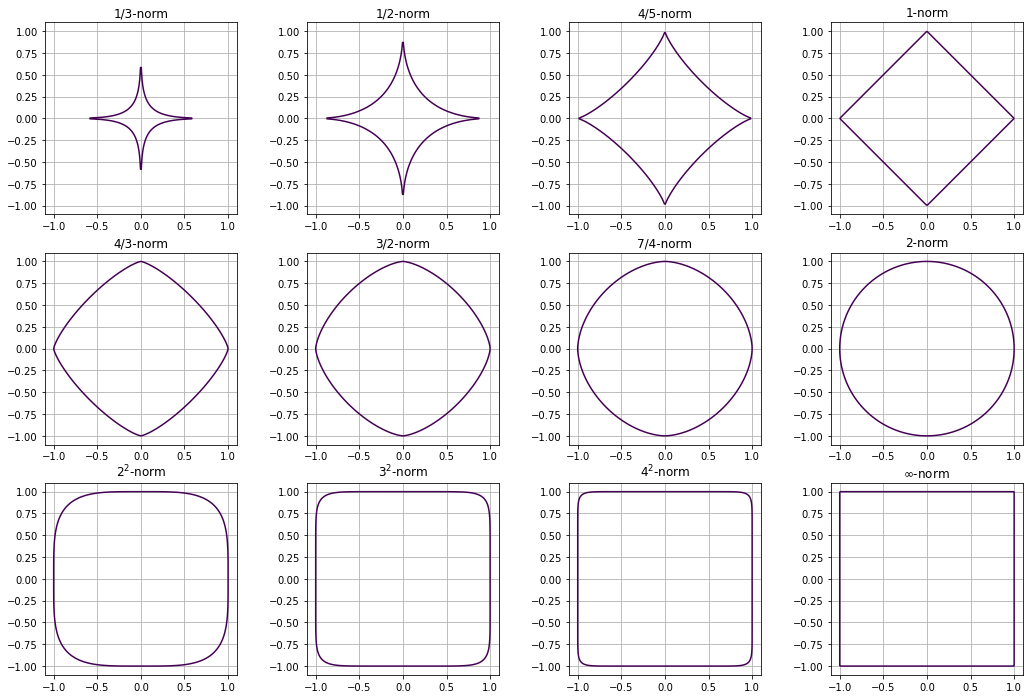

In [10]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [1.0 / 3.0, 0.5, 4.0 / 5.0, 1, 1.3, 1.5, 1.75, 2, 4, 9, 16, numpy.infty]
titles = ["1/3-norm", "1/2-norm", "4/5-norm", "1-norm", "4/3-norm", "3/2-norm", "7/4-norm", 
          "2-norm", "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(3, 4, i + 1, aspect='equal')
    unit_ball(axes, ord)
    axes.set_title(titles[i])
plt.show()

**(b)** [10] Now write a function that produces a plot of the image of the unit-ball given a matrix $A$ and returns the resulting matrix norm.  Both of these can be estimates of the norm but mind the time it takes to compute them.  You can also use `numpy.linalg.norm` for vectors but **NOT** the matrix (unless you want to check your answer).

In [11]:
def unit_ball_image(axes, A, ord):
    """Plot the image of the unit ball under the tranformation resulting from *A* 
    and return an estimate of the matrix norm 
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot the transformed ball on
     - *A* (ndarray) Matrix that represents the mapping (transformation)
     - *ord* (float) The norm requested.
     
    :Output:
     - (float) Maximum norm estimate (i.e. the matrix norm)
    """
    # YOUR CODE HERE

    N = 250

    x, y = numpy.meshgrid(numpy.linspace(-1.1, 1.1, N), numpy.linspace(-1.1, 1.1, N))

    z = numpy.zeros((N, N))

    for i in range(len(z)):

      for j in range(len(z[0])):

        z[i, j] = numpy.linalg.norm(numpy.array([x[i, j], y[i, j]]), ord=ord)

    cont = axes.contour(x, y, z, 'w', levels=[1])

    # extract x and y points from contour
    p = cont.collections[0].get_paths()[0]
    v = p.vertices
    x = v[:,0]
    y = v[:,1]

    # plot transformation under A
    z = numpy.vstack((x, y))
    z_transform = numpy.dot(A, z).T
    axes.plot(z_transform[:, 0], z_transform[:, 1], label=str(ord) + " unit ball")

    # plot norm transformation under A
    maxnorm = numpy.max(numpy.linalg.norm(z_transform, ord=ord, axis=1))

    axes.grid(True)
    axes.set_xlim((-4, 4))
    axes.set_ylim((-4, 4))

    return maxnorm

    # raise NotImplementedError()
    

0.5-Norm (estimated, true): (7.007224026453531, N/A)
1-Norm (estimated, true): (4.000000000000001, 4.0)
1.5-Norm (estimated, true): (4.066590213474889, N/A)
2-Norm (estimated, true): (4.1305917433843735, 4.130648586880582)
4-Norm (estimated, true): (4.348842450147817, N/A)
9-Norm (estimated, true): (4.645340402228905, N/A)
16-Norm (estimated, true): (4.794205947906388, N/A)
inf-Norm (estimated, true): (4.9879518072289155, 5.0)


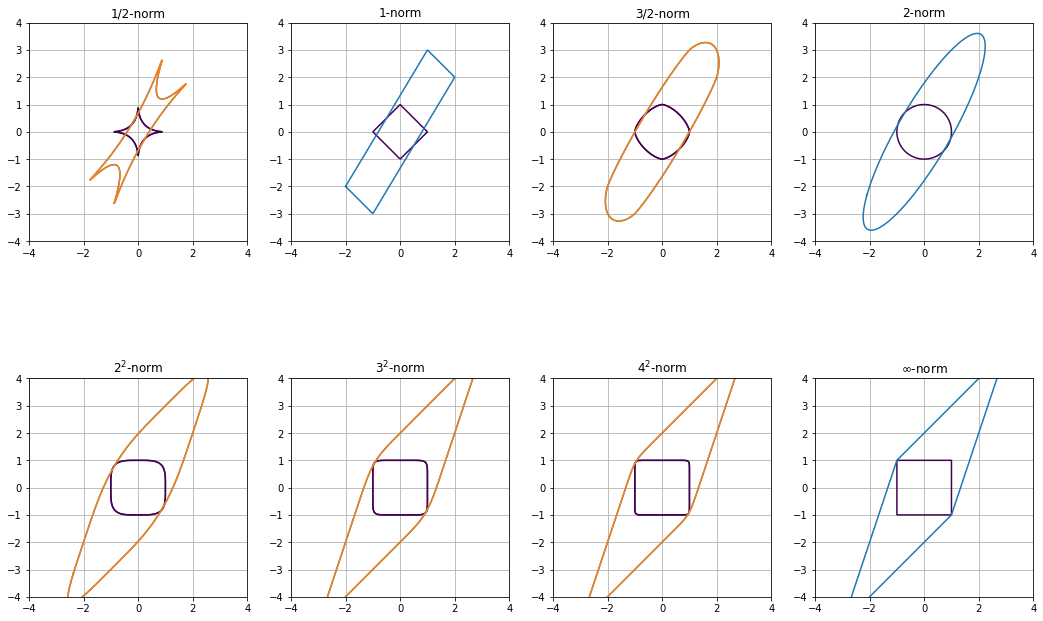

In [12]:
A = numpy.array([[1, 2], [3, 2]])

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [0.5, 1, 1.5, 2, 4, 9, 16, numpy.infty]
titles = ["1/2-norm", "1-norm", "3/2-norm", "2-norm", 
          "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(2, 4, i + 1, aspect='equal')
    try:
        print("%s-Norm (estimated, true): (%s, %s)" % (ord, unit_ball_image(axes, A, ord), numpy.linalg.norm(A, ord=ord)))
    except ValueError:
        print("%s-Norm (estimated, true): (%s, N/A)" % (ord, unit_ball_image(axes, A, ord)))
    axes.set_title(titles[i])
plt.show()

**(c)** [5] What kind of observations can you make based on the two previous questions?  What connection to geometry do you see?  Are the matrix norms requested in part (b) that do not have a `numpy` implementation actually norms?

YOUR ANSWER HERE

In the previous questions, we can see that for norms less than 1, there is a curved/concave diamond geometry generated. For norms greater than 1, a convex diamond geometry is generated where the sides of the diamond curve outwards rather than inwards from the corners, until eventually (at infinite normalization) the graph appears like a square. When the graphs are transformed, they appear in an elliptical form or a parallelogram, depending on the initial form before the transformation. For norms greater than 2, the transformed shape generated is similar to a parallelogram, whereas for norms in between 1 and 2, an elliptical transformation occurs. 

Some of the matrix norms requested are invalid. For a $p-norm$, the $p-norm$ is valid when $p \geq 1$, because if $0 \leq p < 1$, then the normalization will violate the Triangle Inequality. numpy.linalg.norm does not implement all of the norms that we estimated, such as 0.5, 1.5, 4, 9, or 16. Although the norms greater than 1 are valid, they may not be possible to compute with an inner product or may not satisfy matrix norm conditions. The norm of 0.5 violates the Triangle Inequality. 